<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/Main_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Assignment 
## Written by Abiola Obembe
### Date: 2021-02-24
### Course: ML masters with deployment and deep learning
### Objective: Predicting Survival in the Titanic Data Set
-----------------------------------------------------------------------------
### ----------  Assignment starts here -------------------------------------------------

## Dataset
In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.

In [2]:
# Loading Data and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 


# Import other libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print('Libraries installed successfully!')

np.random.seed(0)



Libraries installed successfully!


In [4]:
# Load dataset and print feature columns
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

features.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [13]:
# Print shape of features
features.shape

(506, 13)

In [14]:
# Print dataframe info
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
# Print target column
print(targets[0:5])


[24.  21.6 34.7 33.4 36.2]
(506,)


In [15]:
# Print shape of target 
targets.shape

(506,)

## Explorartory Data Analysis

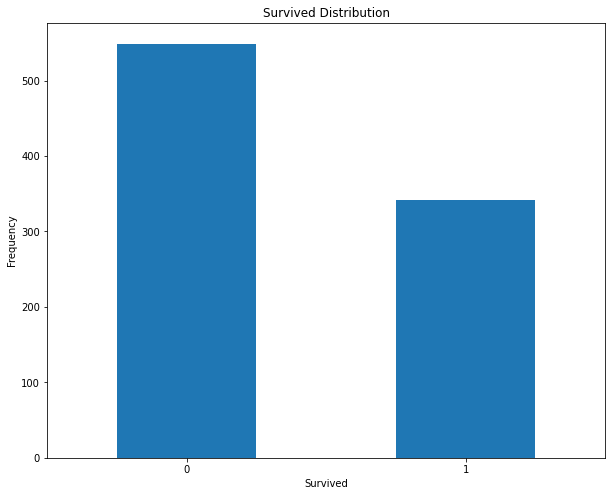

In [ ]:
# Examine the shape of the X dataframe
bos.shape

In [ ]:
# Bascic statistics
titanic.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [ ]:
# Check for missing values
print("The missing values in each column are as below :")
titanic.isna().sum()

The missing values in each column are as below :


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
# Check if Age is missing at random
titanic.groupby(titanic['Age'].isnull()).mean()

Survived    Pclass        Age     SibSp     Parch       Fare
Age                                                                
False  0.406162  2.236695  29.699118  0.512605  0.431373  34.694514
True   0.293785  2.598870        NaN  0.564972  0.180791  22.158567

We observe that 40% of the missing ages survived as compared to 20% for passengers with age not missing. This implies that Age was not missing at random. We will create an indicator variable to capture this.

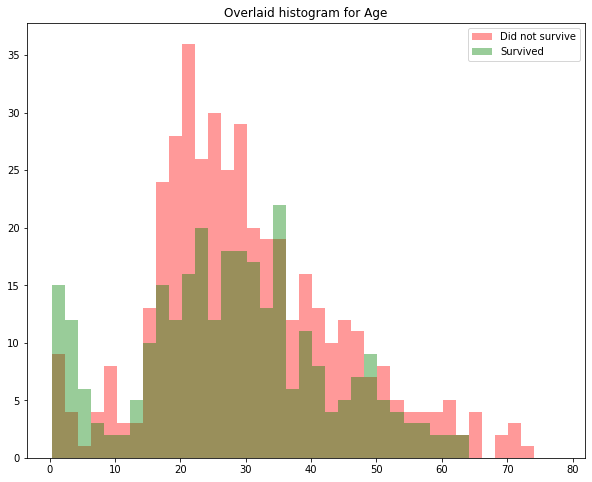

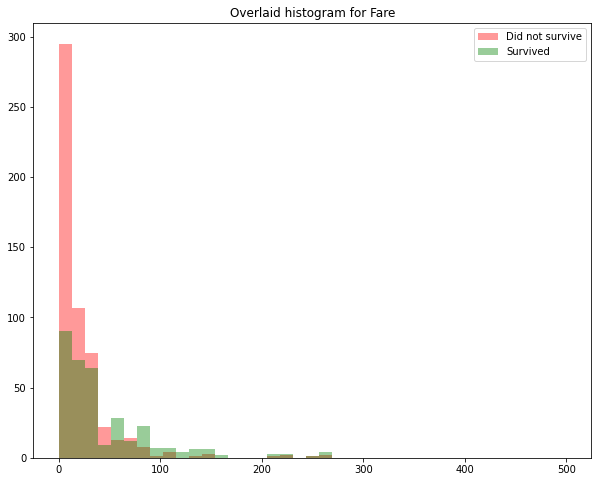

In [ ]:
# Plot contiuous features
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 720x576 with 0 Axes>

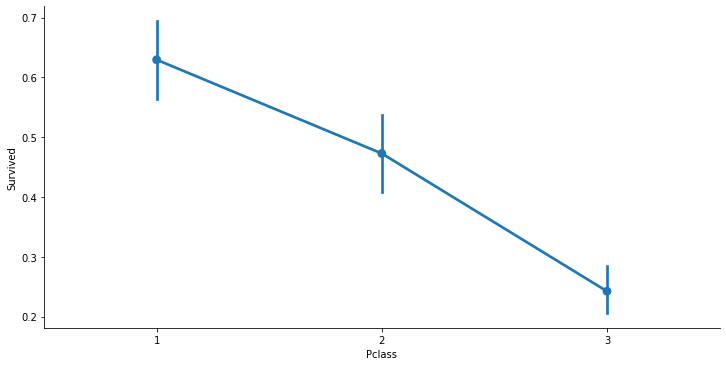

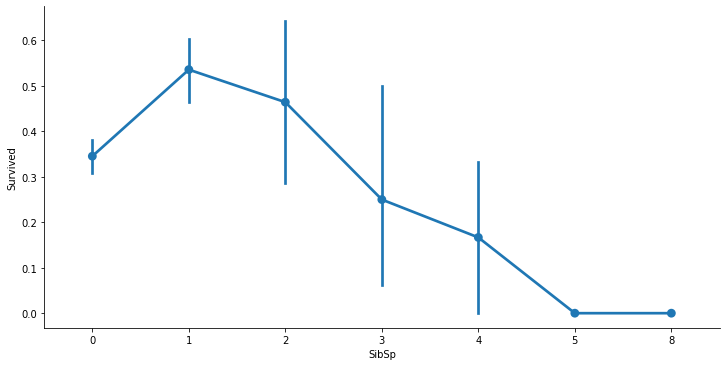

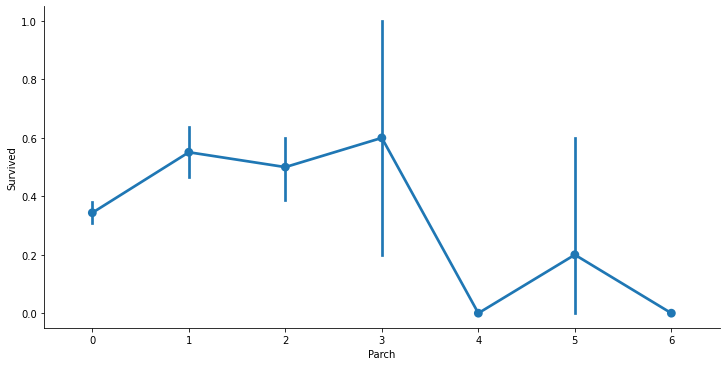

In [ ]:
# Investigate the effect of Pclass, SibSP and Parch on survival
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

In [ ]:
# Create indicator variablle
titanic['age_ind']= np.where(titanic['Age'].isnull(), 0,1)

# drop original Age column
titanic.drop('Age', axis=1, inplace= True)

titanic.head()

Survived  Pclass     Sex  SibSp  Parch     Fare  age_ind
0         0       3    male      1      0   7.2500        1
1         1       1  female      1      0  71.2833        1
2         1       3  female      0      0   7.9250        1
3         1       1  female      1      0  53.1000        1
4         0       3    male      0      0   8.0500        1

In [ ]:
# Print shape of dataframe
print("The shape of the dataframe is :", titanic.shape)

The shape of the dataframe is : (891, 7)


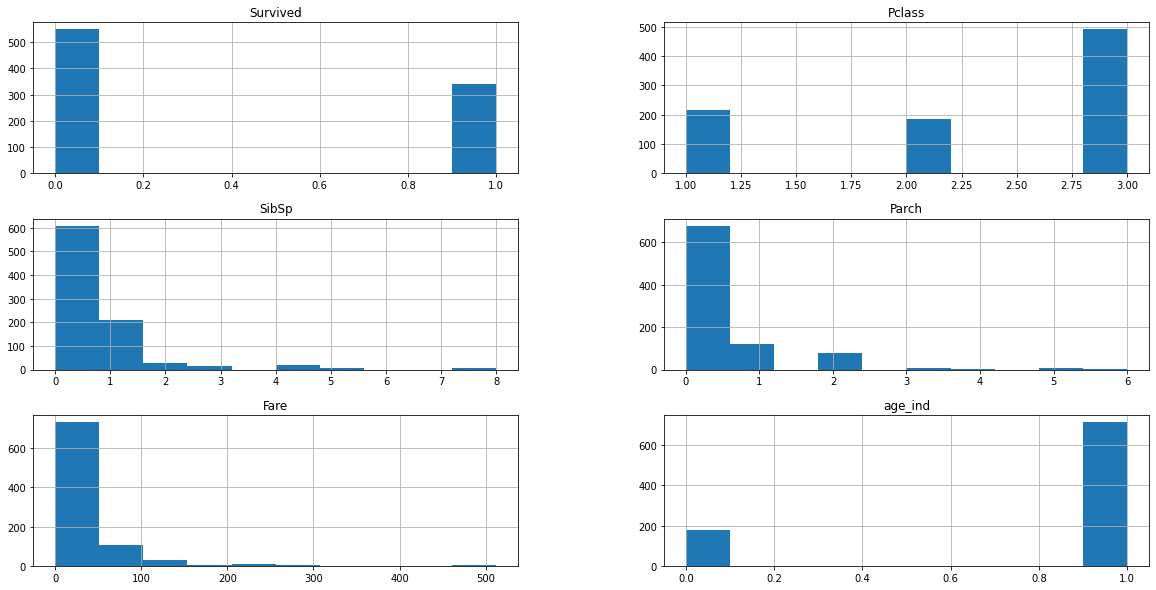

In [ ]:
# Visualize histogram of dataset
titanic.hist(figsize= (20,10), bins= 10)
plt.show()

In [ ]:
# Extract numerical and categorical columns from train dataframe
numerical_cols = [cname for cname in titanic.columns if
                titanic[cname].dtype in ['int64', 'float64']]

# Extract categorical features from dataframe
category_cols = [col for col in titanic.columns if titanic[col].dtype == "object"]
category_features = category_cols.copy()
category_cols.append('Survived')


In [ ]:
# Let us see the cardanilatity of each column for the categorical columns in train and test set
# Unique value sin each columns
for cols in category_features:
    print("Unique values in", cols,  "column in dataset:", titanic[cols].nunique())
    print("*"*80)

Unique values in Sex column in dataset: 2
********************************************************************************


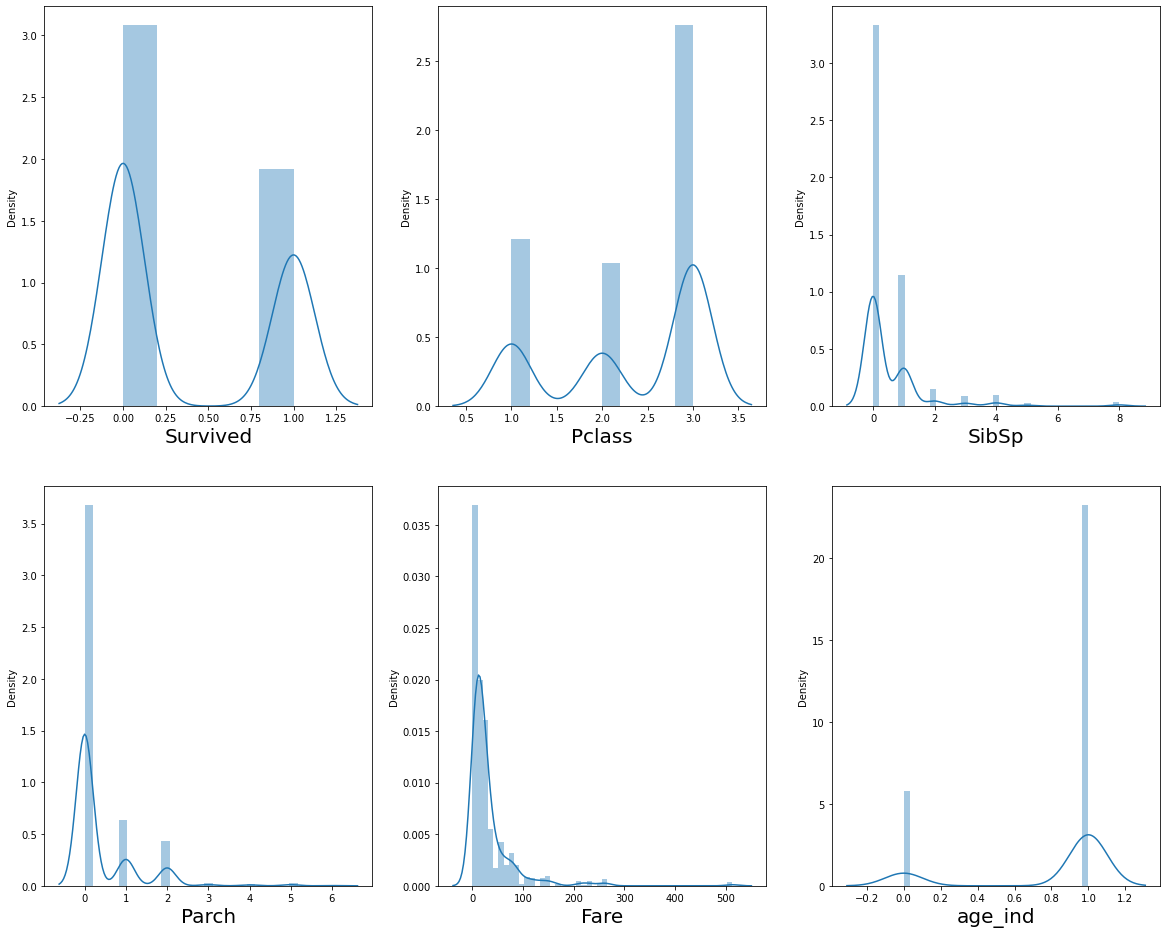

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in titanic[numerical_cols]:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(titanic[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
# Calculate the skewness and kurtosis values
for col in titanic[numerical_cols].columns:
    print(col)
    print("skewness:", titanic[col].skew())
    print("kurtosis:", titanic[col].kurtosis())
    print('-'*35)

Survived
skewness: 0.4785234382949897
kurtosis: -1.775004671066304
-----------------------------------
Pclass
skewness: -0.6305479068752845
kurtosis: -1.2800149715782825
-----------------------------------
SibSp
skewness: 3.6953517271630565
kurtosis: 17.880419726645968
-----------------------------------
Parch
skewness: 2.7491170471010933
kurtosis: 9.778125179021648
-----------------------------------
Fare
skewness: 4.787316519674893
kurtosis: 33.39814088089868
-----------------------------------
age_ind
skewness: -1.5131104860634934
kurtosis: 0.290149590230226
-----------------------------------


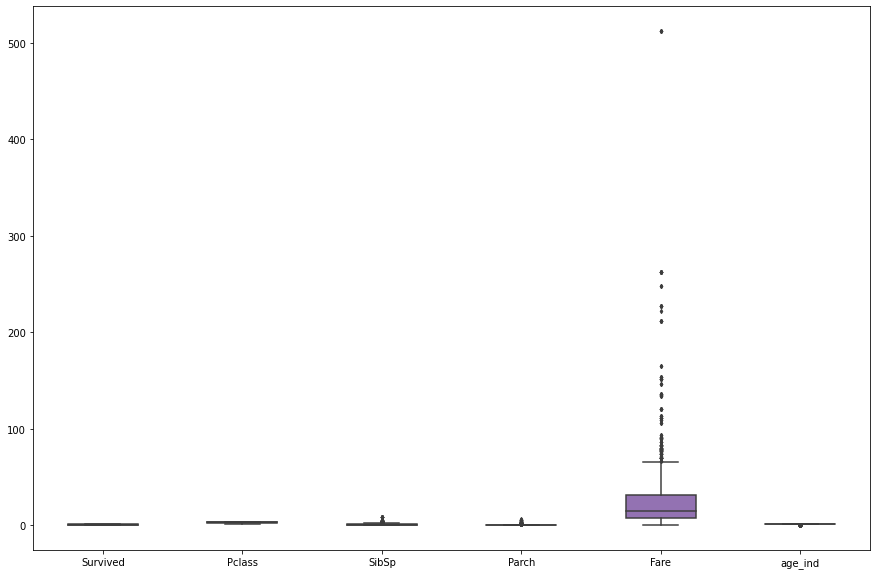

In [ ]:
# Check for ouliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=titanic, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [ ]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(titanic[numerical_cols]))
zscore

array([[0.78927234, 0.82737724, 0.43279337, 0.47367361, 0.50244517,
        0.49789473],
       [1.2669898 , 1.56610693, 0.43279337, 0.47367361, 0.78684529,
        0.49789473],
       [1.2669898 , 0.82737724, 0.4745452 , 0.47367361, 0.48885426,
        0.49789473],
       ...,
       [0.78927234, 0.82737724, 0.43279337, 2.00893337, 0.17626324,
        2.0084567 ],
       [1.2669898 , 1.56610693, 0.4745452 , 0.47367361, 0.04438104,
        0.49789473],
       [0.78927234, 0.82737724, 0.4745452 , 0.47367361, 0.49237783,
        0.49789473]])

In [ ]:

## For simplicity remove all data with outliers
titanic_clean = titanic.copy()
titanic_clean = titanic[(zscore <3).all(axis = 1)]
print("The shape of the original dataframe is :", titanic.shape)
print("The shape of the clean dataframe is :", titanic_clean.shape)


deleted_entries = titanic.shape[0] - titanic_clean.shape[0]
print("Entries deleted in the dataframe are :",  deleted_entries)

The shape of the original dataframe is : (891, 7)
The shape of the clean dataframe is : (827, 7)
Entries deleted in the dataframe are : 64


In [ ]:
## For simplicity remove all data with outliers
#q = titanic['Fare'].quantile(0.95)
# we are removing the top 10% data from the Fare column
#titanic_clean = titanic[titanic['Fare']<q]


#q = titanic_clean['Parch'].quantile(0.98)
# we are removing the top 2% data from the BMI column
#titanic_clean  = titanic_clean[titanic_clean['Parch']<q]
#q = titanic_clean['SibSp'].quantile(0.98)
# we are removing the top 2% data from the SkinThickness column
#titanic_clean  = titanic_clean[titanic_clean['SibSp']<q]


#deleted_entries = titanic.shape[0] - titanic_clean.shape[0]
#print("Entries deleted in the dataframe are :",  deleted_entries)

In [ ]:
# Encode Gender column as onehot ecoding
data= pd.get_dummies(titanic_clean, columns=['Sex'], drop_first=True)

data.head()

Survived  Pclass  SibSp  Parch     Fare  age_ind  Sex_male
0         0       3      1      0   7.2500        1         1
1         1       1      1      0  71.2833        1         0
2         1       3      0      0   7.9250        1         0
3         1       1      1      0  53.1000        1         0
4         0       3      0      0   8.0500        1         1

In [ ]:
# Split dataset into features and target variable
X = data.drop(columns = 'Survived')
y = data['Survived']

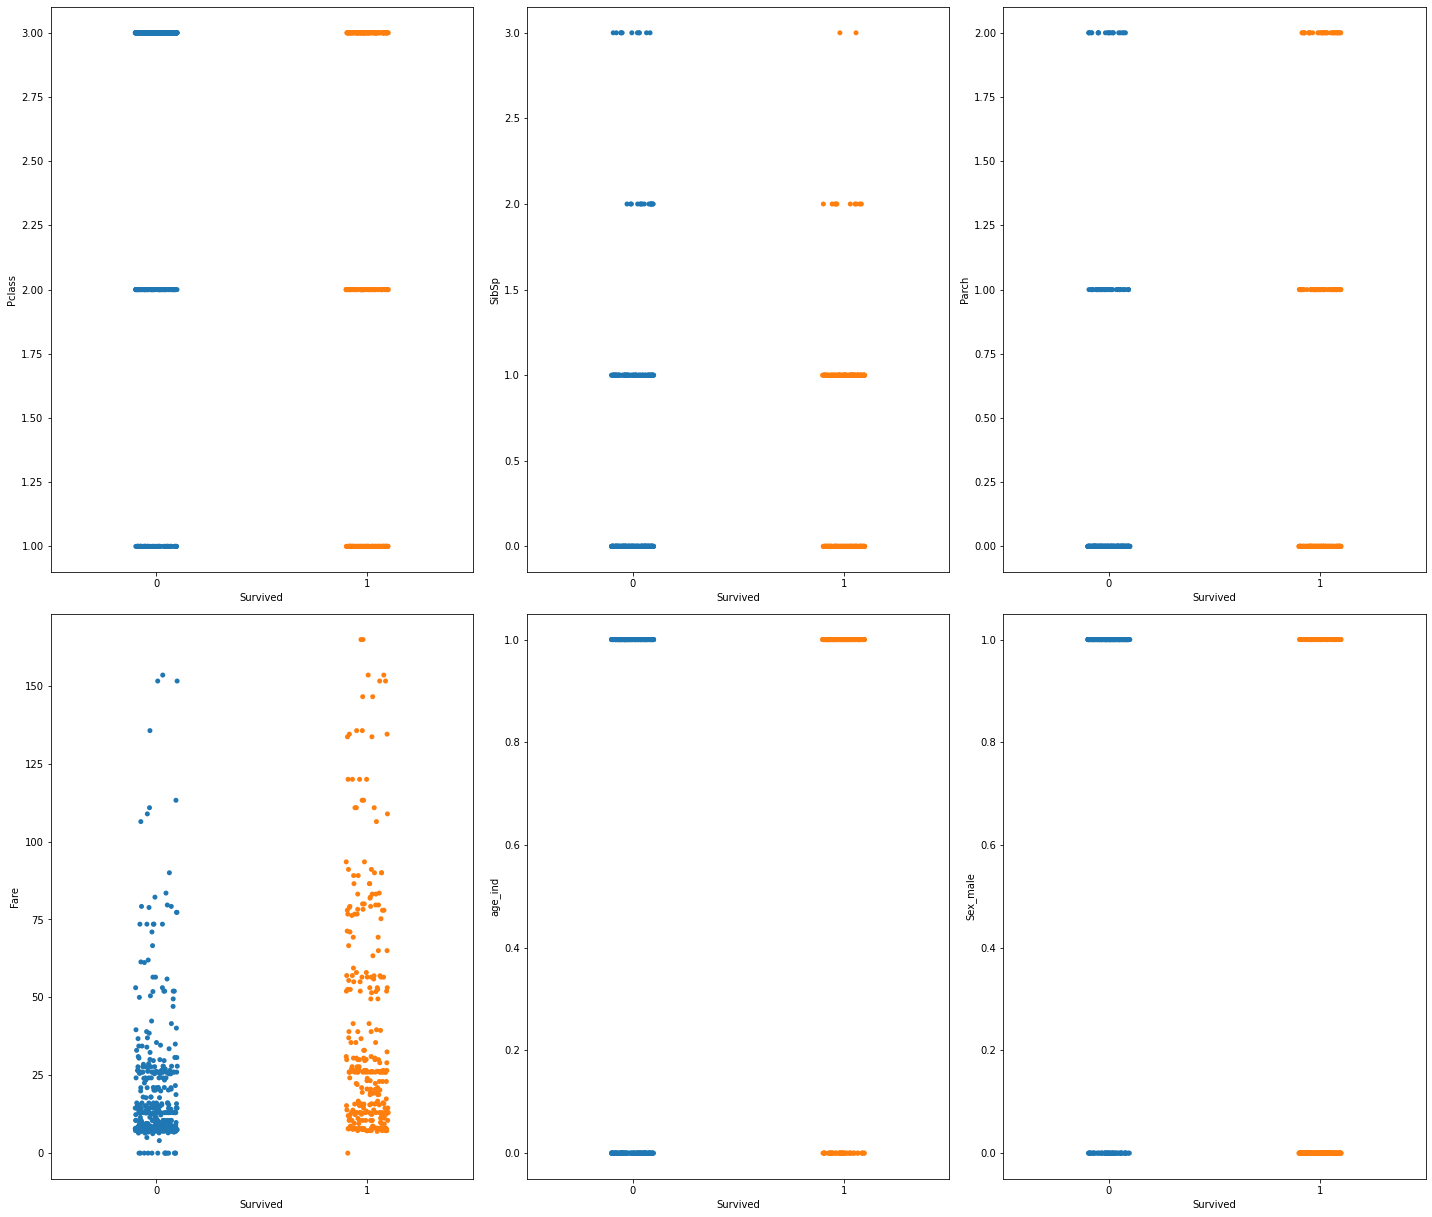

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y, X[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:

# Let's move ahead and check for multicollinearity.
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

VIF  Features
0  2.036470    Pclass
1  1.179871     SibSp
2  1.214114     Parch
3  2.239084      Fare
4  1.049866   age_ind
5  1.119263  Sex_male

Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use Decision Tree Classfier and see how good it fits our data. But first. let's split our data in train and test.

In [ ]:
# Split dataset into train and test set
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.18)

In [ ]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'SibSp', 'Parch', 'Fare', 'age_ind', 'Sex_male']

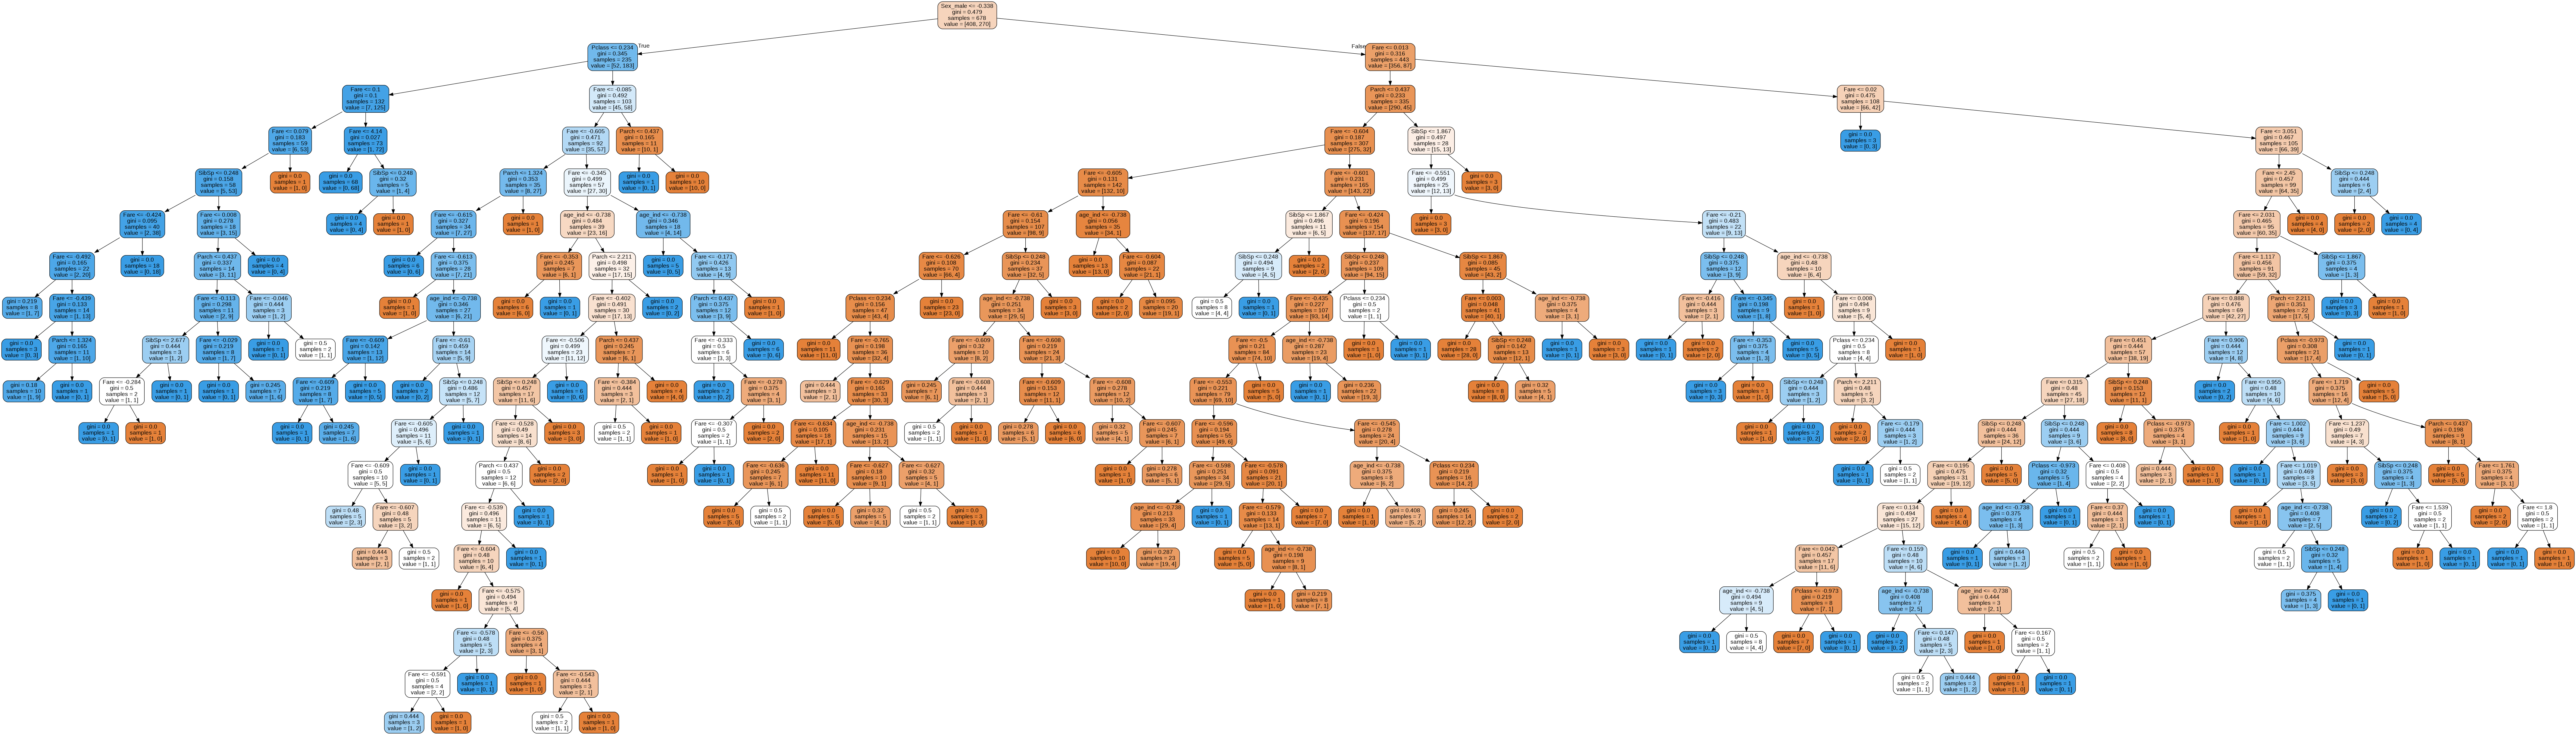

In [ ]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [ ]:
# Evaluate model on train set
clf.score(x_train,y_train)

0.9247787610619469

In [ ]:
# Evaluate model on test set

y_pred = clf.predict(x_test)

print("accuracy score on test set is :", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)


print("The confusion matrix report on test set is summarized below: ")
print(conf_mat)
print("The classification report on test set is summarized below :")
print(class_report)

accuracy score on test set is : 0.8120805369127517
The confusion matrix report on test set is summarized below: 
[[87 11]
 [17 34]]
The classification report on test set is summarized below :
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        98
           1       0.76      0.67      0.71        51

    accuracy                           0.81       149
   macro avg       0.80      0.78      0.78       149
weighted avg       0.81      0.81      0.81       149



In [ ]:
# Print other evaluation metrics
print("The f1 score is :", f1_score(y_test, y_pred))
print("The precision score is :", precision_score(y_test, y_pred))
print("The recall score is :", recall_score(y_test, y_pred))

print("The ROC-AUC score is :", roc_auc_score(y_test, y_pred))

The f1 score is : 0.7083333333333334
The precision score is : 0.7555555555555555
The recall score is : 0.6666666666666666
The ROC-AUC score is : 0.7772108843537414


### Hyperparameter tunning

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [ ]:
# Create grid search object/class
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [ ]:
# Fit model on training set
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
# Print best parameters
best_parameters = grid_search.best_params_
print(best_parameters)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'random'}
0.8155773420479303


In [ ]:
# Print best model
clf2 = grid_search.best_estimator_
clf2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
# Save model
import pickle
# Writing different model files to file
with open( 'DecisionTree.pkl', 'wb') as f:
    pickle.dump(clf2,f)
    
with open('standardScalar.pkl', 'wb') as f:
    pickle.dump(scaler,f)

In [ ]:
# Let's train model using the best model
clf2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
# Evaluate model on test set

y_pred = clf2.predict(x_test)

print("accuracy score on test set is :", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)


print("The confusion matrix report on test set is summarized below: ")
print(conf_mat)
print("The classification report on test set is summarized below :")
print(class_report)

accuracy score on test set is : 0.8120805369127517
The confusion matrix report on test set is summarized below: 
[[87 11]
 [17 34]]
The classification report on test set is summarized below :
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        98
           1       0.76      0.67      0.71        51

    accuracy                           0.81       149
   macro avg       0.80      0.78      0.78       149
weighted avg       0.81      0.81      0.81       149



In [ ]:
# Print other evaluation metrics
print("The f1 score is :", f1_score(y_test, y_pred))
print("The precision score is :", precision_score(y_test, y_pred))
print("The recall score is :", recall_score(y_test, y_pred))

print("The ROC-AUC score is :", roc_auc_score(y_test, y_pred))

The f1 score is : 0.7083333333333334
The precision score is : 0.7555555555555555
The recall score is : 0.6666666666666666
The ROC-AUC score is : 0.7772108843537414


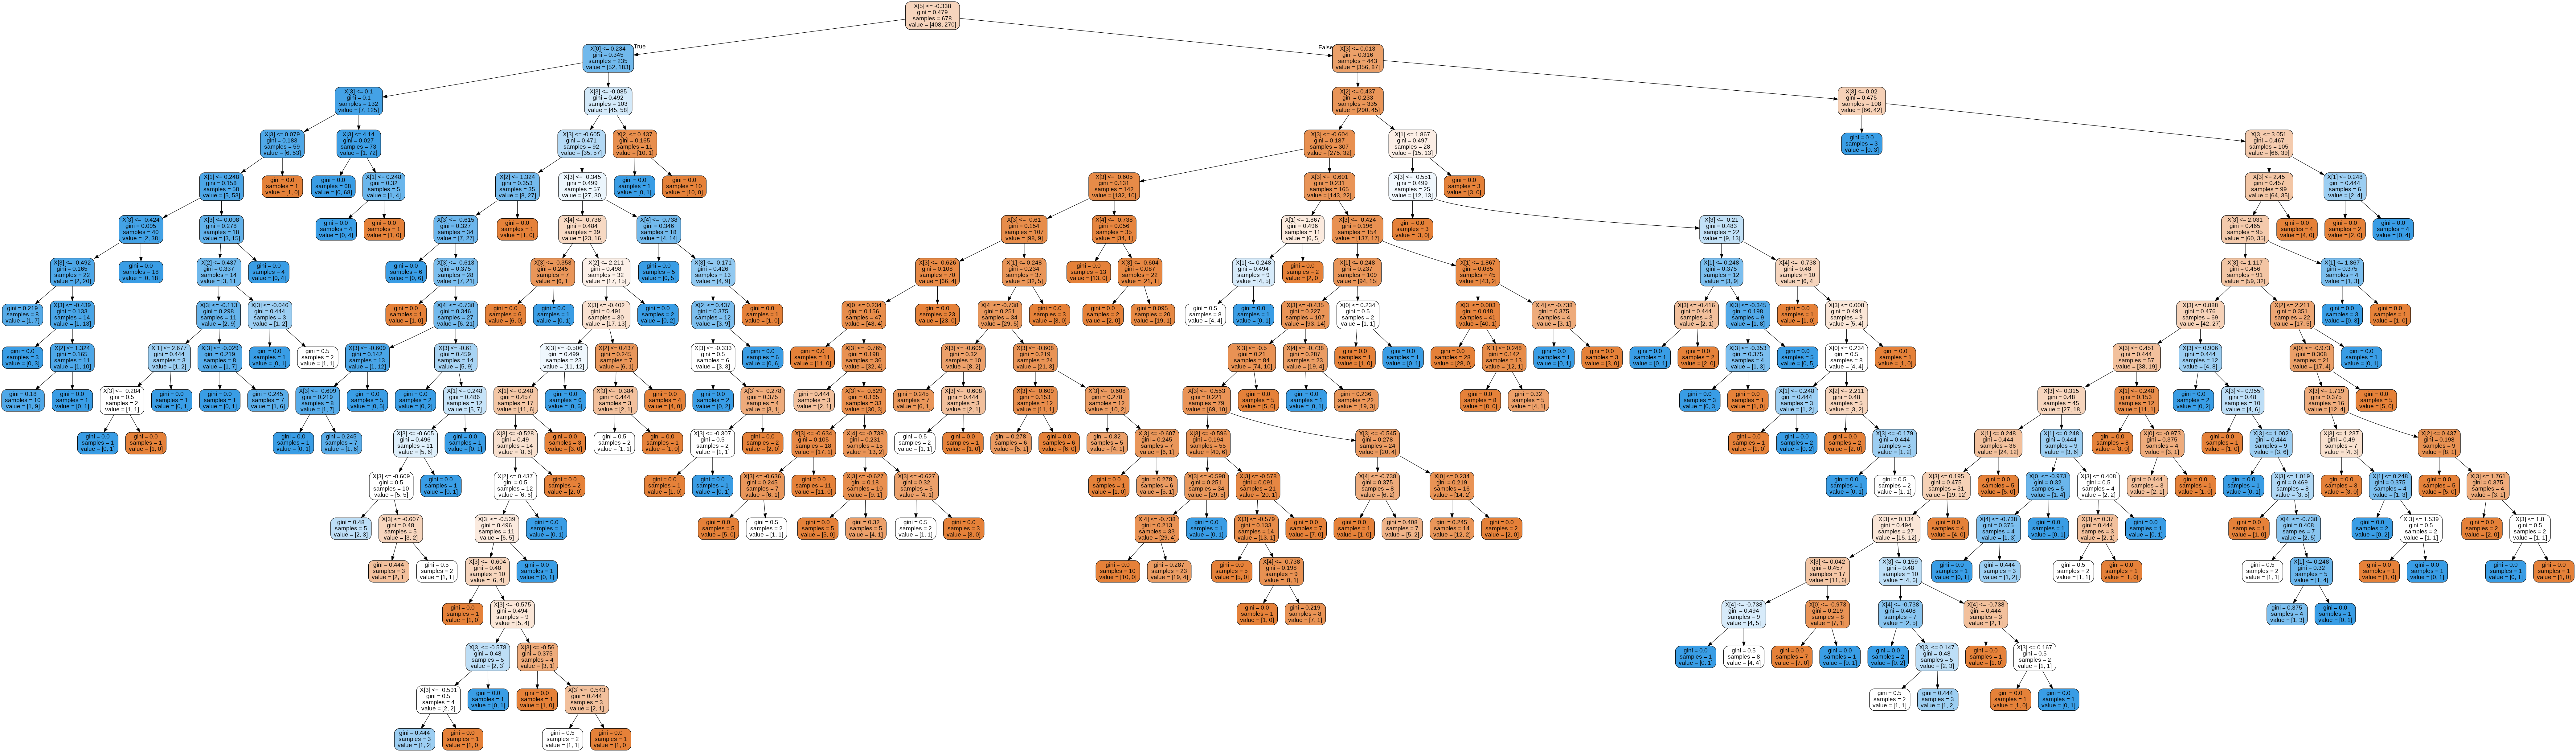

In [ ]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

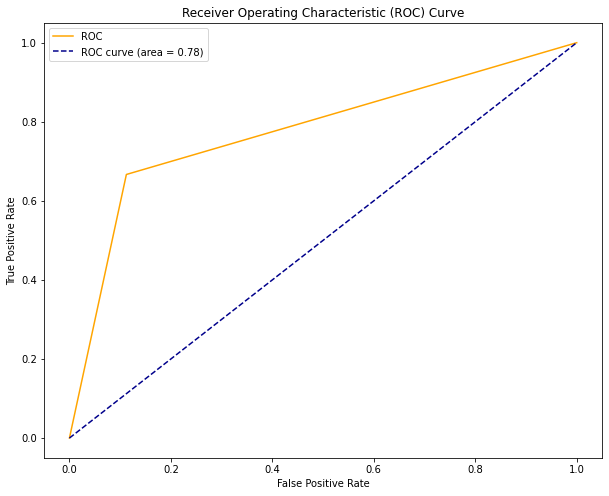

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()